# Introduction
**Machine Learning (ML)** is a method of data analysis to perform a specific task based on existence patterns in data and inference instead of explicit instructions. It seems that detecting patterns is an important task in ML. But, what is pattern?

Assume you have the following dataset (in a dataframe form) about information of age and income of 20 people.

In [1]:
#Import libraries
import pandas as pd
import random # added for data generation
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(
    {'Age' : [20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40],
     'Income' :[2400,2500,2600,2700,2800,2900,3000,3100,3200,3300,3500,
                3600,3700,3800,3900,4000,4100,4200,4300,4400]}
)
df.head()

,Age,Income
0,20,2400
1,21,2500
2,22,2600
3,23,2700
4,24,2800


Do you see any relation between Age and Income? We have already learned how to create different plots. Let's use a plot which can show the relation between two variables. By relation we mean how the values of Income would cha?nge with the changes in the values of Age. We can show this relationship with a Scatter plot. Let's show a scatter plot of Age versus Income.

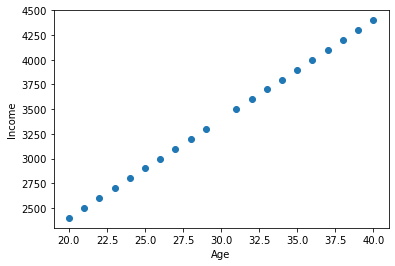

In [3]:
plt.scatter(df['Age'],df['Income'])
#plt.scatter(df.Age,df.Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Considering the plot above, can you guess which one of the following can be the values of Income of a person who is 41?

* 4000
* 2000
* 4500

If you chose 4500, you are right. As you can see by increasing the age values, the income values always increase as well. Congrats! You detected the **general pattern** in this data set.

**PATTERN of this Data Set:** By increasing the Age, Income increases as well.


Now let us change the data set a bit and add information of other people from a different country to see if the general pattern changes or not.


In [4]:
dfNewCountry= pd.DataFrame(
    {'Age' : [21,27,28,39,35],
     'Income' :[2550,1600,1600,2300,3800]}
)
dfNewCountry

,Age,Income
0,21,2550
1,27,1600
2,28,1600
3,39,2300
4,35,3800


In [6]:
df

,Age,Income
0,20,2400
1,21,2500
2,22,2600
3,23,2700
4,24,2800
5,25,2900
6,26,3000
7,27,3100
8,28,3200
9,29,3300


In [8]:
dfAllCountries=pd.concat([df,dfNewCountry])
dfAllCountries.reset_index()

,index,Age,Income
0,0,20,2400
1,1,21,2500
2,2,22,2600
3,3,23,2700
4,4,24,2800
5,5,25,2900
6,6,26,3000
7,7,27,3100
8,8,28,3200
9,9,29,3300


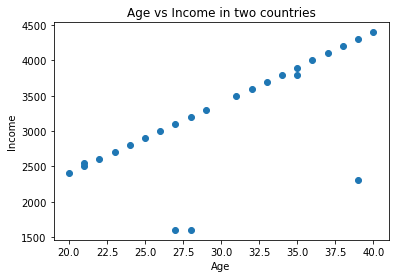

In [9]:
plt.scatter(dfAllCountries['Age'],dfAllCountries['Income'])
plt.xlabel('Age')
plt.title('Age vs Income in two countries')
plt.ylabel('Income')
plt.show()

Again, try to answer this question. Considering the plot above, can you guess which of the following Income would be the income of a person who is 41?

* 4000
* 2000
* 4500

If your answer is 4500, you are right! Otherwise, please bear in your mind the following tip:

In ML, Pattern refers to ***general pattern*** and we ignore the minority of data points which have different values from the majority when we detect the pattern. In the plot 'Age vs Income in two countries', we ignore infomration of 3 people whose income values were far from the rest and just determine the pattern based on the general increasing relation between values of Age and Income.
It seems that by detecting the general pattern, we are able to predict the income of people who are older than 40. Age is called an independent variabe or predictor whereas Income is  dependent or respone variable. We use independent variable to predict the value of dependent variable, e.g, we used variable 'Age' (Inependent variable) to predict variable 'Income'(Dependent Variable).

What you did to guess the income of a person who has 41, was an example of prediction. You took a look at the data and understood the relation between Age and income for those who are between 18 and 40 and predicted the Income of a a person who has 41. That's exactly what ML does. We give a dataset to a machine learning algorithm, it finds general patterns (builds a model) and does predictions based on the given dataset. Then, the model predicts the income of those who are older than 40 based on the detected general pattern.

# Liner Regression

Linear regression is a linear approach to detect the relationship between a response and one or more Independent variables. First, we create a data set and then we define a linear function represents the general pattern between dependent and independent variables.

# Generate Data

In [34]:
random.seed(123)
indVar=random.sample(range(1, 30), 20)
indVar

[2, 9, 3, 25, 14, 28, 4, 29, 13, 18, 20, 11, 19, 22, 27, 15, 6, 24, 21, 23]

In [35]:
#depVar = indVar
depVar = indVar[:]
depVar

[2, 9, 3, 25, 14, 28, 4, 29, 13, 18, 20, 11, 19, 22, 27, 15, 6, 24, 21, 23]

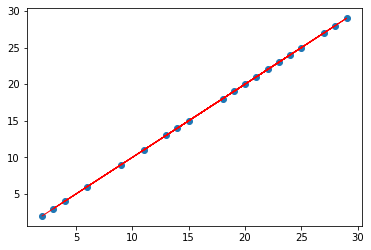

In [37]:
plt.scatter(indVar,depVar)
plt.plot(indVar,depVar,'r-', linewidth=1)
plt.show()

In [38]:
trueX = indVar[:]
trueY = depVar[:]

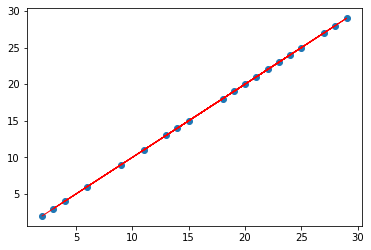

In [40]:
plt.scatter(indVar,depVar)
plt.plot(trueX,trueY,'r-', linewidth=1)
plt.show()

# Add Noise to the dataset

In [41]:
#Adding noise to X
random.seed(1)
noiseXVals=random.sample(range(1, 30), 10)
indVar.extend(noiseXVals)

In [42]:
indVar

[2, 9, 3, 25, 14, 28, 4, 29, 13, 18, 20, 11, 19, 22, 27, 15, 6, 24, 21, 23, 5, 19, 26, 25, 3, 9, 4, 16, 15, 22]

In [46]:
#Adding Noise to Y
#random.seed(123)
noiseYVals=[x+round(random.uniform(-10,6)) for x in noiseXVals]
depVar.extend(noiseYVals)

In [47]:
indVar

[2, 9, 3, 25, 14, 28, 4, 29, 13, 18, 20, 11, 19, 22, 27, 15, 6, 24, 21, 23, 5, 19, 26, 25, 3, 9, 4, 16, 15, 22]

In [48]:
depVar

[2, 9, 3, 25, 14, 28, 4, 29, 13, 18, 20, 11, 19, 22, 27, 15, 6, 24, 21, 23, 5, 22, 18, 15, 6, 6, 6, 6, 12, 24]

In [56]:
# Just for illustration
round(random.uniform(-10,8))

-3

## Can you find a mathematical function which represents the general pattern in your data set?!

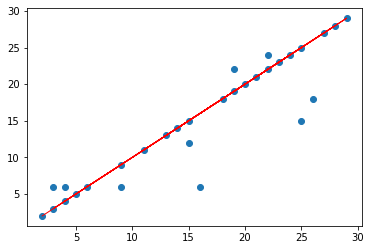

In [60]:
plt.scatter(indVar,depVar)
plt.plot(trueX,trueX,'r-', linewidth=1)
plt.show()

What if data is scattered more?! Let us add more noise to this data set by following commands and see if we can still represent the general trend by a line.


Let us add more noise to the data set and try to see if you can find a line which represents the general pattern.

In [64]:
#Adding noise to X
# random.seed(123)
noiseXVals=random.sample(range(1, 30), 25)      
indVar.extend(noiseXVals)

In [65]:
#Adding Noise to Y
#random.seed(123)
noiseYVals=[x+round(random.uniform(-10,6)) for x in noiseXVals]
depVar.extend(noiseYVals)

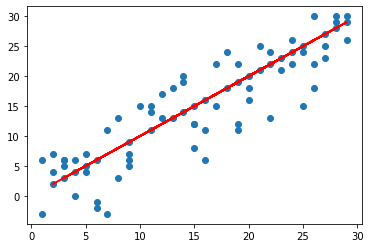

In [70]:
#plot again 
plt.scatter(indVar,depVar)
plt.plot(trueX,trueY,'r-', linewidth=2)
plt.show()

##### Do you think that the line which you found is the best line?
If so, can you take a look at the next plot and say which line is the best line? The blue one or Red one?! How can you evaluate it?

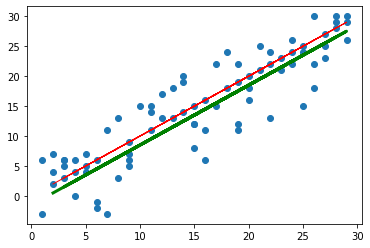

In [72]:
trueYNew=[x-1.5 for x in trueY]
plt.scatter(indVar,depVar)
plt.plot(trueX,trueY,'r-', linewidth=1)
plt.plot(trueX,trueYNew,'g-', linewidth=3)
plt.show()

# Linear Regression in Python

There are different packages in Python which can be used to create a linear regression model. We use package scipy to create our model.

In [73]:
from scipy.stats import linregress
#from sklearn.linear_model import LinearRegression

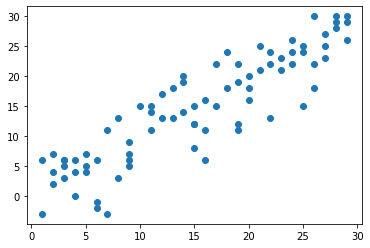

In [74]:
plt.scatter(indVar,depVar)
#plt.show()

In [75]:
slope, intercept, r_value, p_value, std_err = linregress(indVar,depVar)

In [76]:
print("slope: %f		intercept: %f" % (slope, intercept))
print("r-value: %f" % r_value)
print("p-value: %f" % p_value)
print("std-err: %f" % std_err)

slope: 0.929901		intercept: 0.473622
r-value: 0.892921
p-value: 0.000000
std-err: 0.053088


In [77]:
# With the slope and the intercept we can use the 'for' syntax to compute the line (a list of y-values corresponding to the input x-values)
line = [slope*xi + intercept for xi in indVar]

In [79]:
# We can then plot the 'line': 
fig= plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

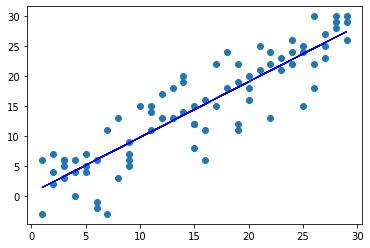

In [80]:
# our 'raw' data
plt.scatter(indVar, depVar)
# our earlier manual estimated line
#plt.plot(trueX,trueYNew,'g-', linewidth=1)	
# the line created by the linregress() function
plt.plot(indVar,line,'b-', linewidth=1)
plt.show() 

Now, you can see the ebst line is slightly different from those which we have already had.
## ***Practice:***
Create a linear regression model for the following dtaframe. Which variable should be considered as independent and which one should be considered as dependent? 

In [81]:
df = pd.DataFrame(
    {'Name' : ['Mike','Aaron','Brad','Steve','George','Mitchell',
               'Shaun','Glenn','Pat','Robert','David'],
     'Age' : [22, 25, 25, 26, 28, 28, 31, 32, 33, 39, 44],
     'Runs' :[1000, 980, 900, 900, 828, 700, 672, 662, 655, 600, 557]}
)

In [83]:
slope, intercept, r_value, p_value, std_err = linregress(df['Age'],df['Runs'])

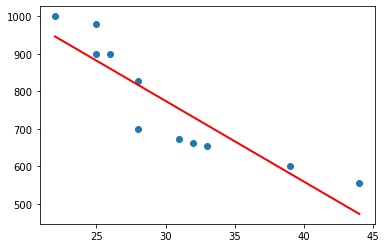

In [84]:
line = [slope*xi + intercept for xi in df['Age']]
# We can then plot the 'line': 

plt.plot(df['Age'],line,'r-', linewidth=2)
# And add the original data points to the same plot:

plt.scatter(df['Age'], df['Runs'])
plt.show() 

In [85]:
print("slope: %f		intercept: %f" % (slope, intercept))
print("r-value: %f" % r_value)
print("p-value: %f" % p_value)

slope: -21.492357		intercept: 1419.177707
r-value: -0.893398
p-value: 0.000211


## Practice : 
Create another a linear regression model for dfAllCountries? 

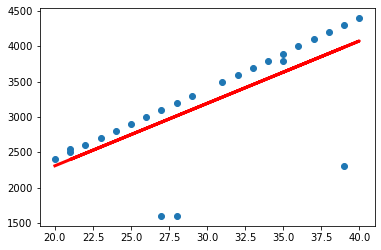

In [86]:
slope, intercept, r_value, p_value, std_err = linregress(dfAllCountries['Age'],dfAllCountries['Income'])
# With the slope and the intercept we can use the 'for' syntax to compute the line (a list of y-values corresponding to the input x-values)

line = [slope*xi + intercept for xi in dfAllCountries['Age']]
# We can then plot the 'line': 

plt.plot(dfAllCountries['Age'],line,'r-', linewidth=3)
# And add the original data points to the same plot:

plt.scatter(dfAllCountries['Age'], dfAllCountries['Income'])
plt.show() 

In [ ]:
print(r_value,p_value)

## Practice 
Do you think that you can use your model to predict income of 70 years old person? Why? Why not?
### Hint: The relation between independent and dependent variable ***SHOULD*** be assumed linear to be able to use Linear regression

**No**, because the relation between age and income is not increasing for those who are older than 60 and our prediction will not be accurate.